# Flower classification with TensorFlow Lite Model

In [3]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [20]:
import tensorflow_datasets as tfds

In [ ]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

In [23]:
num_classes = dataset_info.features['label'].num_classes
num_classes

5

In [24]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2936
Total Number of Validation Images: 734 



# Reformat Images and Create Batches

In [25]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


# Create TensorFlow model.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1572992   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 1,573,637
Trainable params: 1,573,637
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Train Model

In [32]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 43s 111ms/step - loss: 0.7520 - accuracy: 0.7159 - val_loss: 0.4212 - val_accuracy: 0.8651
Epoch 2/10
92/92 [==============================] - 9s 94ms/step - loss: 0.3732 - accuracy: 0.8726 - val_loss: 0.3315 - val_accuracy: 0.8924
Epoch 3/10
92/92 [==============================] - 9s 94ms/step - loss: 0.2874 - accuracy: 0.9060 - val_loss: 0.2908 - val_accuracy: 0.8992
Epoch 4/10
92/92 [==============================] - 9s 94ms/step - loss: 0.2433 - accuracy: 0.9278 - val_loss: 0.2903 - val_accuracy: 0.9060
Epoch 5/10
92/92 [==============================] - 9s 94ms/step - loss: 0.2074 - accuracy: 0.9418 - val_loss: 0.2654 - val_accuracy: 0.9142
Epoch 6/10
92/92 [==============================] - 9s 94ms/step - loss: 0.1840 - accuracy: 0.9506 - val_loss: 0.2627 - val_accuracy: 0.9155
Epoch 7/10
92/92 [==============================] - 9s 95ms/step - loss: 0.1616 - accuracy: 0.9561 - val_loss: 0.2526 - val_accuracy: 0.9183
Epoch 8/10


# Evaluate Model

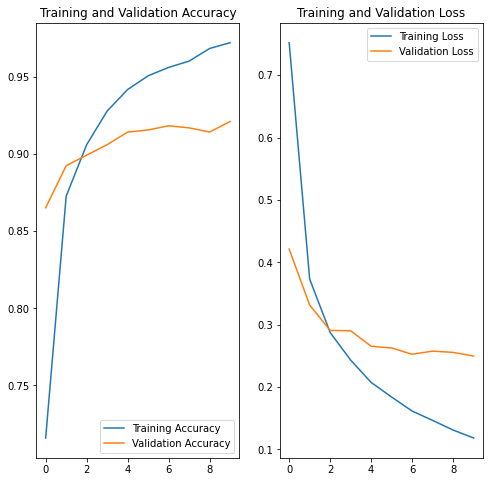

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [36]:
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)

['dandelion' 'daisy' 'dandelion' 'dandelion' 'dandelion' 'tulips'
 'sunflowers' 'dandelion' 'dandelion' 'roses' 'daisy' 'tulips' 'dandelion'
 'roses' 'roses' 'dandelion' 'dandelion' 'roses' 'tulips' 'sunflowers'
 'tulips' 'sunflowers' 'dandelion' 'tulips' 'sunflowers' 'sunflowers'
 'tulips' 'sunflowers' 'dandelion' 'roses' 'dandelion' 'daisy']


In [38]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [0 1 0 0 0 2 3 0 0 4 1 2 0 4 4 0 0 4 2 3 2 3 0 2 3 3 2 3 0 4 0 1]
Predicted labels:  [0 1 0 0 0 2 3 0 0 4 1 2 0 4 4 0 0 4 2 3 2 3 0 2 3 3 2 3 0 4 0 1]


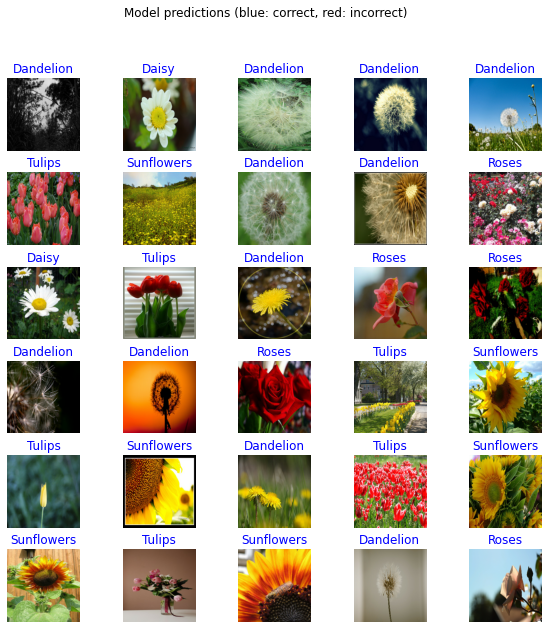

In [46]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Convert Model to TensorFlow Lite model and add metadata to the tflite model.

In [54]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprutut_xc/assets


INFO:tensorflow:Assets written to: /tmp/tmprutut_xc/assets


In [ ]:
!pip install tflite-support-nightly

In [2]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [ ]:
!curl -L https://github.com/tensorflow/tflite-support/raw/master/tensorflow_lite_support/metadata/python/tests/testdata/image_classifier/mobilenet_v2_1.0_224.tflite -o mobilenet_v2_1.0_224.tflite
!curl -L https://github.com/tensorflow/tflite-support/raw/master/tensorflow_lite_support/metadata/python/tests/testdata/image_classifier/labels.txt -o mobilenet_labels.txt

In [ ]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "mobilenet_labels.txt"
_SAVE_TO_PATH = "FlowerModel.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

In [ ]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("FlowerModel.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))

In [ ]:
from google.colab import files
files.download('FlowerModel.tflite') 